In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [256]:
df=pd.read_csv(r"c:\Users\Lenovo\Downloads\Assignment 6 &7\CarPrice_Assignment.csv")
data=df.copy()
data=data.drop(['car_ID'],axis=1)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [258]:
def  data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulss=[]
    dup=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        unique_val.append(np.array(data[col].value_counts().head(10).index))
        n_uniques.append(data[col].nunique())
        nulss.append(data[col].isnull().sum())
        dup.append(data.duplicated().sum())

    return pd.DataFrame({'Col':cols,'dtype':dtypes,'n_uniques':n_uniques,'n_nan':nulss,'unique_val':unique_val,'duplicated':dup})

In [259]:
data_info(data)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,symboling,int64,6,0,"[0, 1, 2, 3, -1, -2]",0
1,CarName,object,147,0,"[toyota corona, toyota corolla, peugeot 504, s...",0
2,fueltype,object,2,0,"[gas, diesel]",0
3,aspiration,object,2,0,"[std, turbo]",0
4,doornumber,object,2,0,"[four, two]",0
5,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",0
6,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
7,enginelocation,object,2,0,"[front, rear]",0
8,wheelbase,float64,53,0,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",0
9,carlength,float64,75,0,"[157.3, 188.8, 171.7, 186.7, 166.3, 165.3, 177...",0


In [260]:
Categorical_Features=['symboling']
for column in data.columns:
    if data[column].dtype=='object':
        Categorical_Features.append(column)
Categorical_Features

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [261]:
Categorical_Features.remove('CarName')
Categorical_Features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

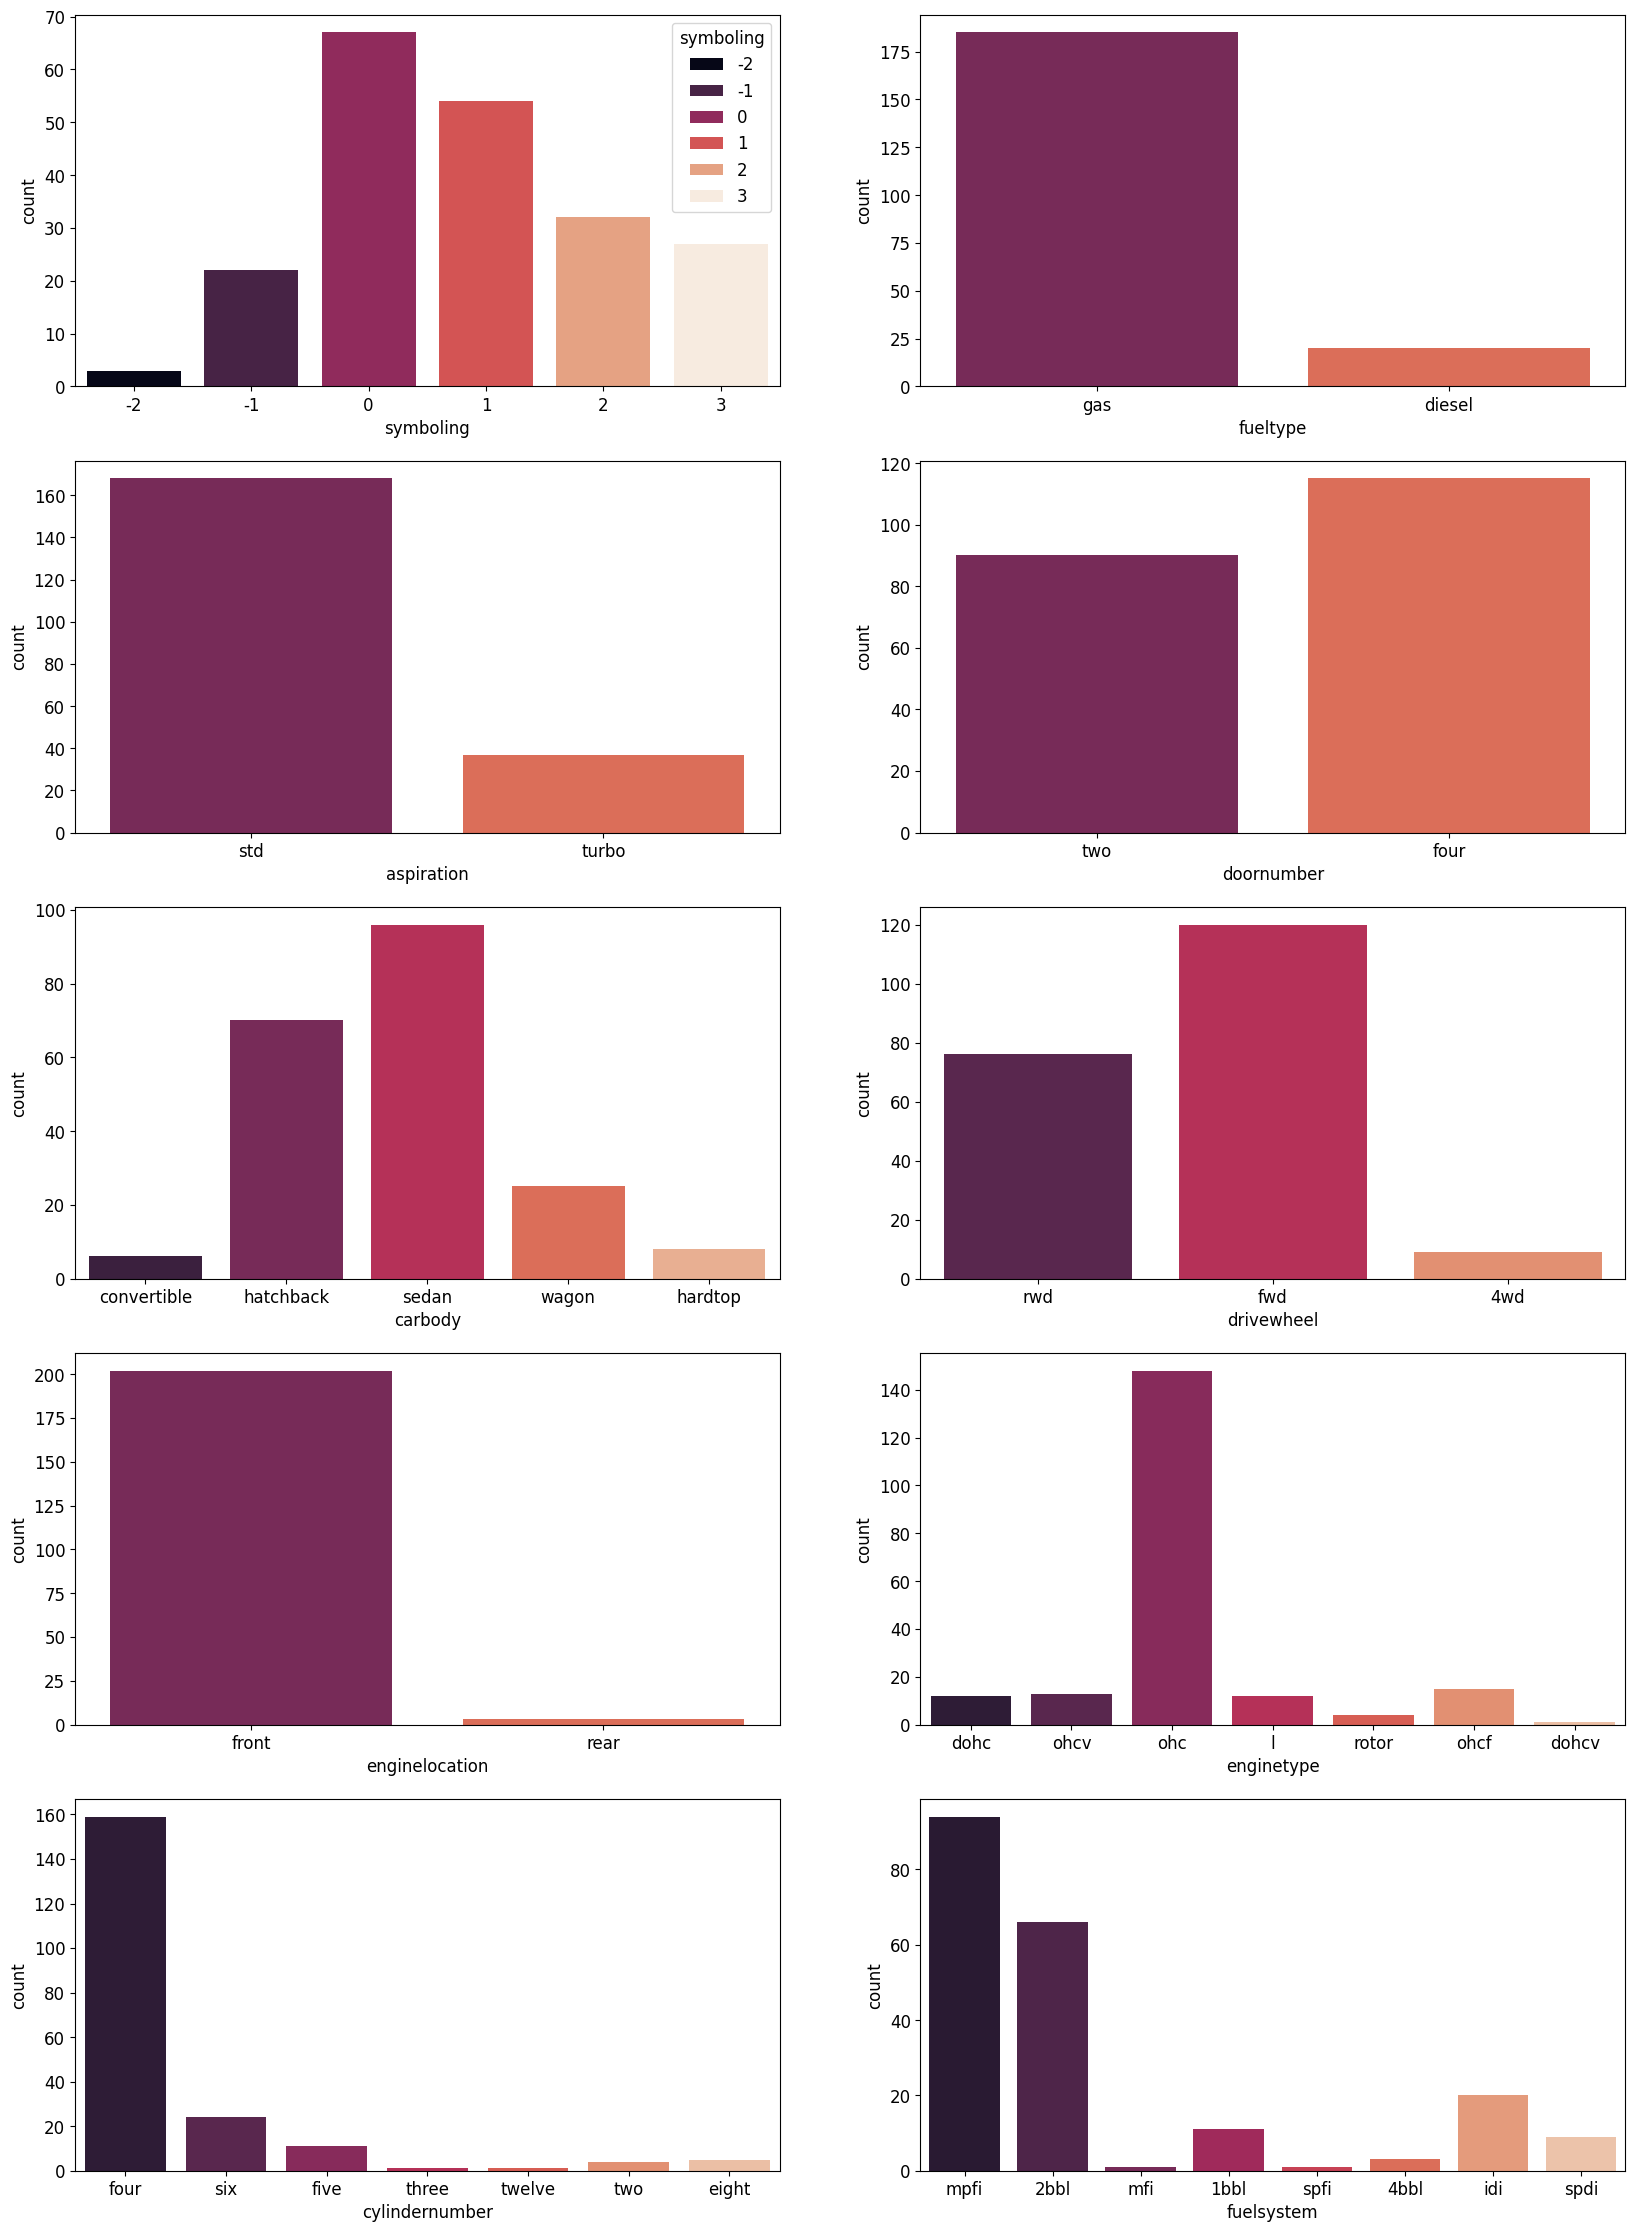

In [262]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20, 28))
for i in range(len(Categorical_Features)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=data[Categorical_Features[i]],palette="rocket",hue=data[Categorical_Features[i]])
plt.show()

In [263]:
numerical_features=list(data.select_dtypes(exclude='object'))
numerical_features.remove('symboling')
numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

compressionratio    2.610862
enginesize          1.947655
price               1.777678
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
citympg             0.663704
highwaympg          0.539997
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64

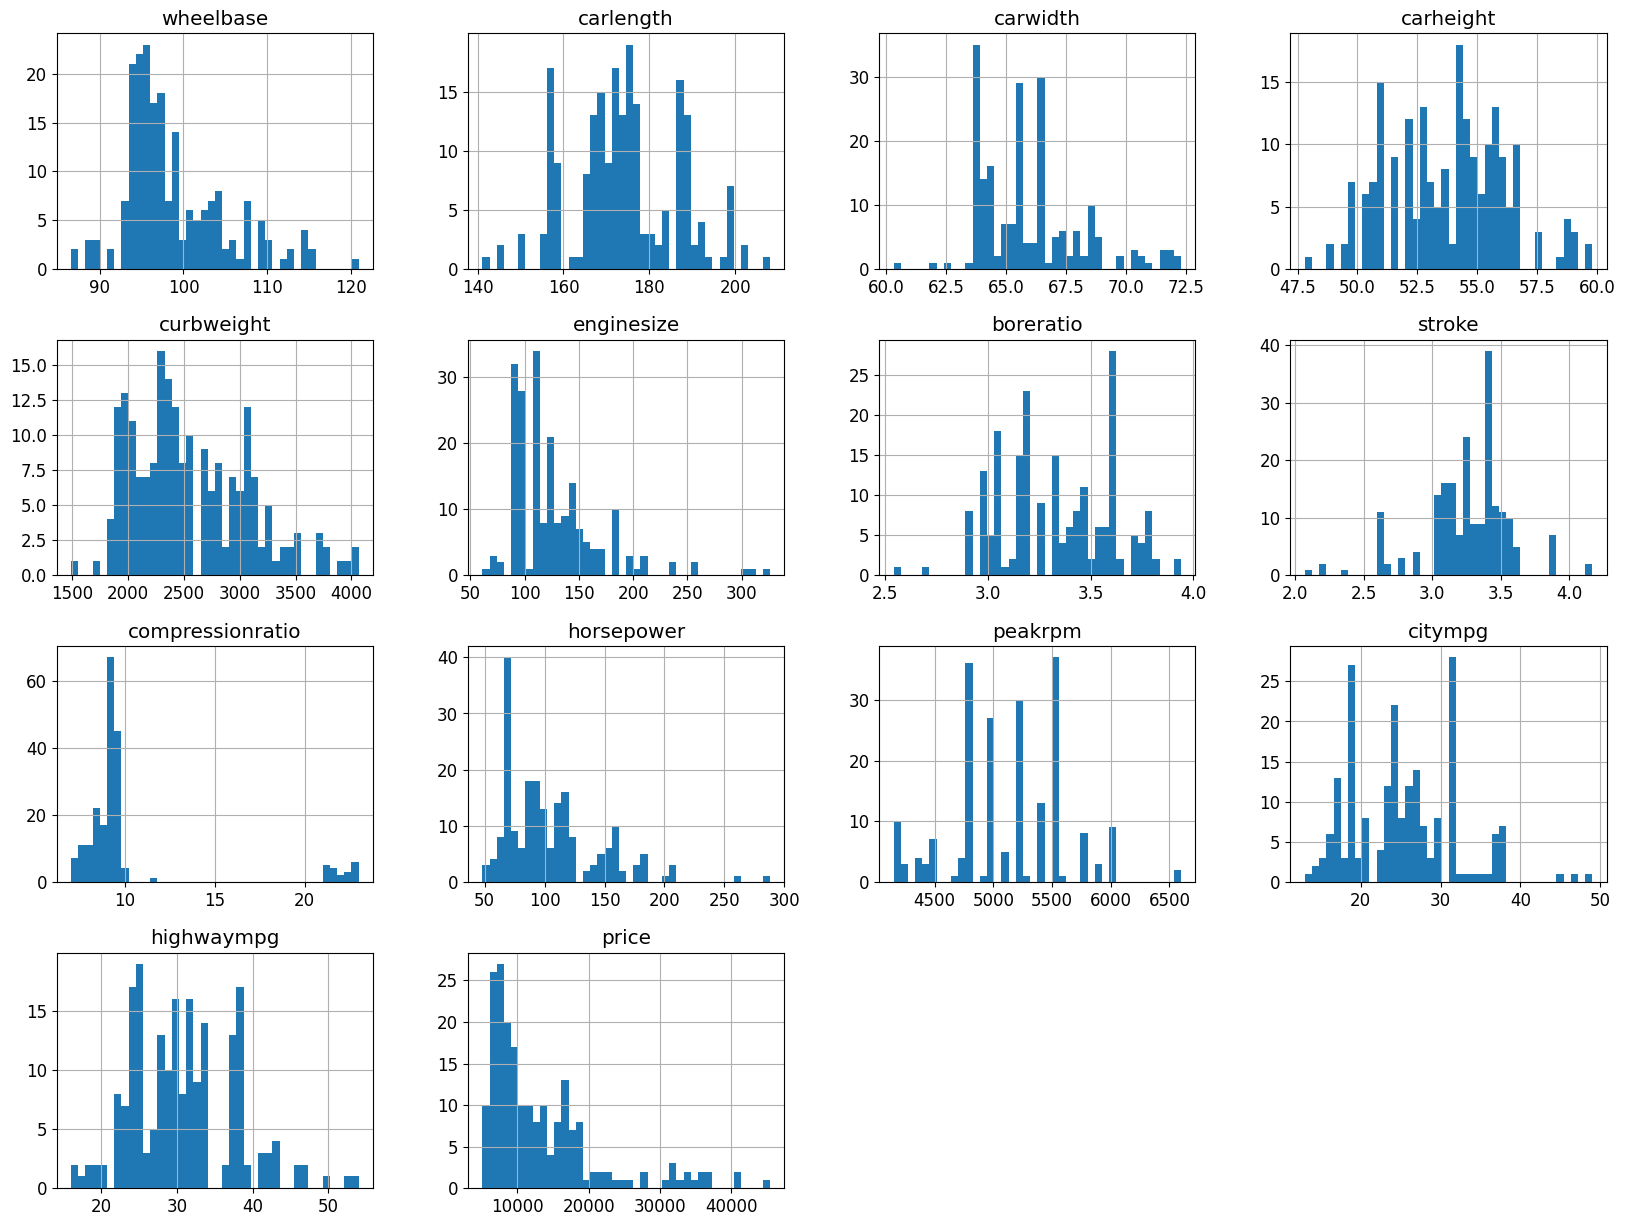

In [264]:
data[numerical_features].hist(bins=40,figsize=(20,15))
data[numerical_features].skew().sort_values(ascending=False)

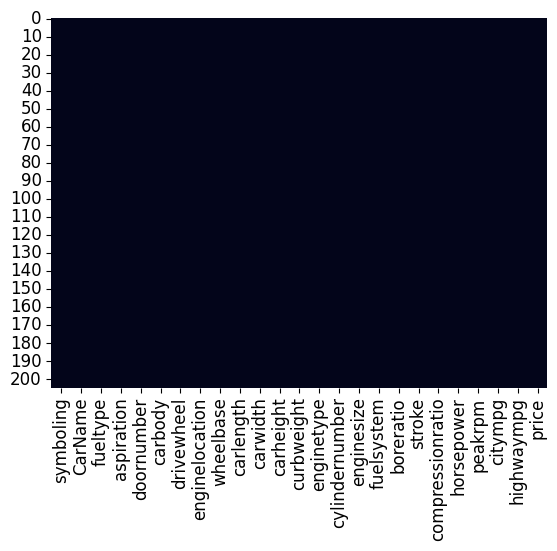

In [265]:
sns.heatmap(data.isnull(),cbar=False,cmap="rocket");

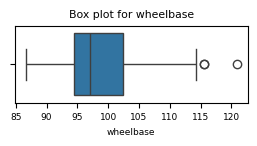

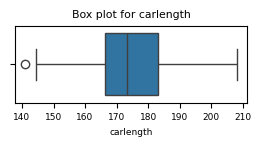

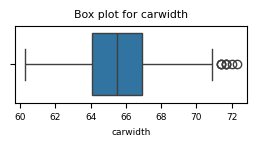

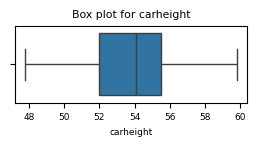

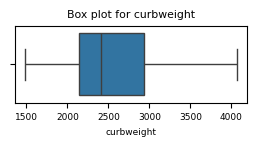

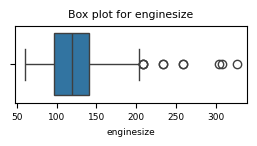

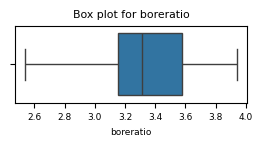

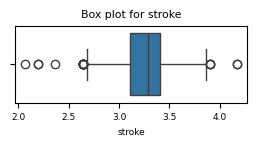

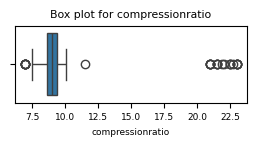

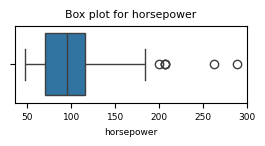

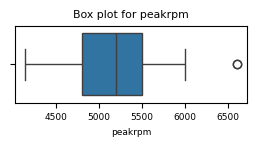

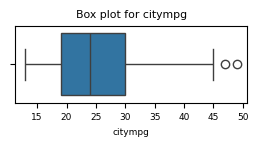

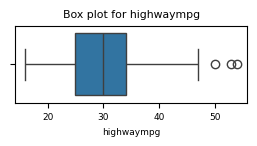

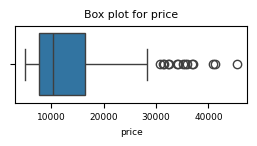

In [266]:
plt.rcParams.update({'font.size': 6.5})
for column in numerical_features:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot for {column}')
    plt.show()

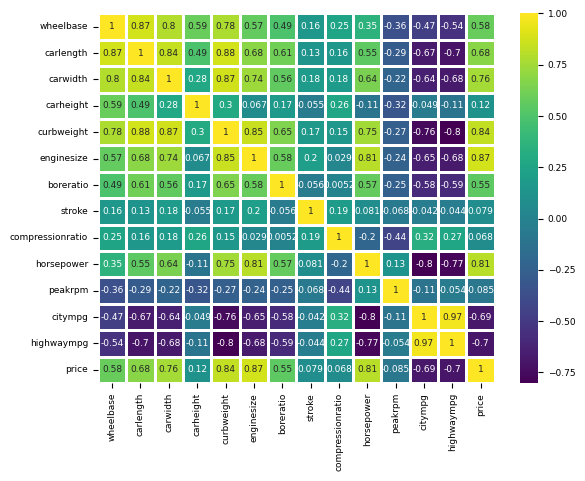

In [267]:
sns.heatmap(data[numerical_features].corr(),annot=True,linewidths=2,cmap="viridis");

In [268]:
data.duplicated().sum()

0

In [269]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_whisker = q1 - 1.5 * iqr
        upper_whisker = q3 + 1.5 * iqr
        filt =  (data[col] < lower_whisker) | (data[col] > upper_whisker)
        data=data.drop(data[filt].index, axis=0)
    data.reset_index(drop=True,inplace=True)
    return data

numerical_features.remove('price')
data2=remove_outliers_iqr(data,numerical_features)

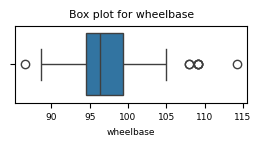

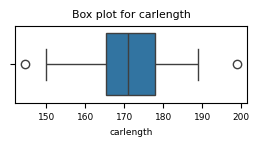

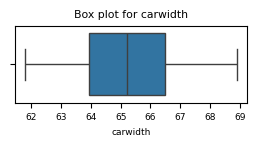

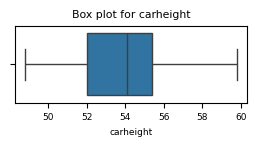

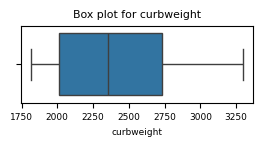

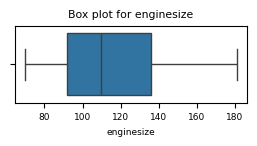

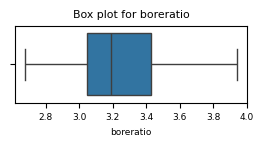

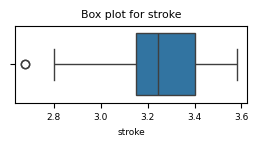

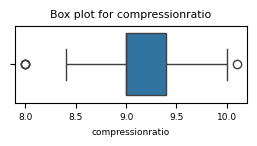

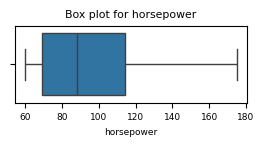

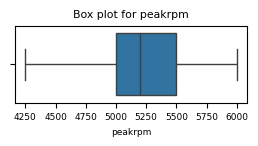

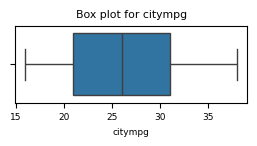

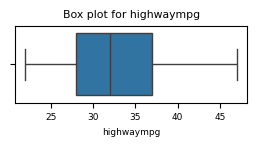

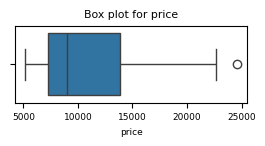

In [270]:
numerical_features.append('price')
for column in numerical_features:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=data2[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [271]:
data2

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
122,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
123,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
124,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [272]:
column_skew=data2[numerical_features].skew().sort_values(ascending=False)
column_skew

wheelbase           1.015226
horsepower          0.941844
price               0.871818
enginesize          0.773884
carwidth            0.591371
boreratio           0.495759
curbweight          0.406308
citympg             0.271885
carheight           0.229522
highwaympg          0.184342
peakrpm             0.059857
carlength           0.017365
compressionratio   -0.441327
stroke             -0.468941
dtype: float64

In [273]:
def logTrans(data,features):
    numeric_features = data.select_dtypes(include=[np.number]).columns
    for feature in features:
        logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_log = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_log,bins=20, kde=True , legend=False)
        plt.xlabel(feature)
        plt.show()
        print(f"Skewness was {round(data[feature].skew(),5)} before & is {round(df_log[0].skew(),5)} after Log transformation.")
        data[feature] = df_log[0]
    return data

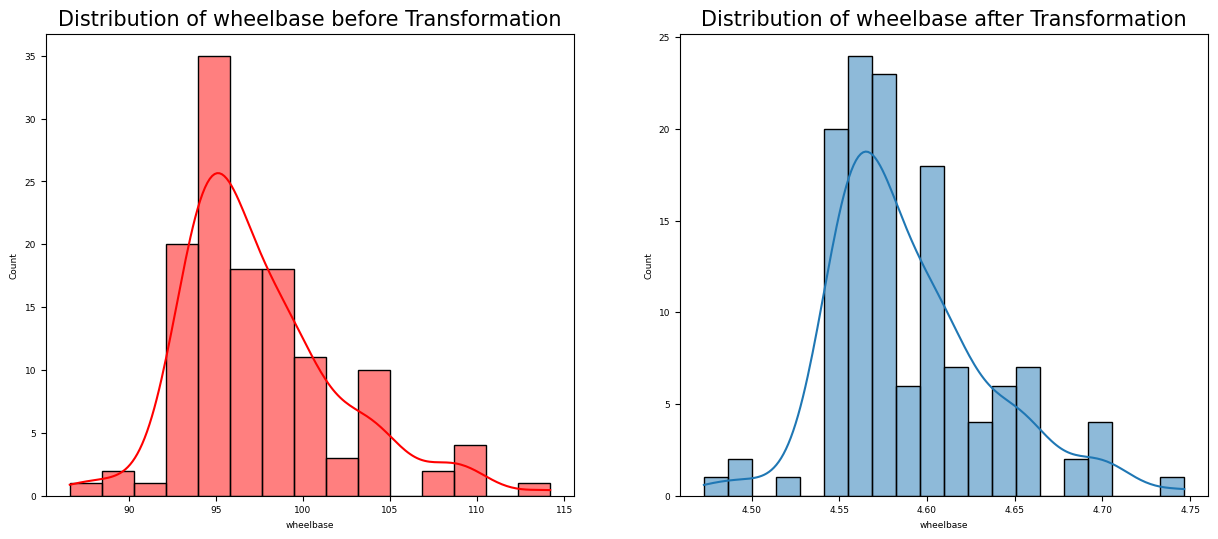

Skewness was 1.01523 before & is 0.85448 after Log transformation.


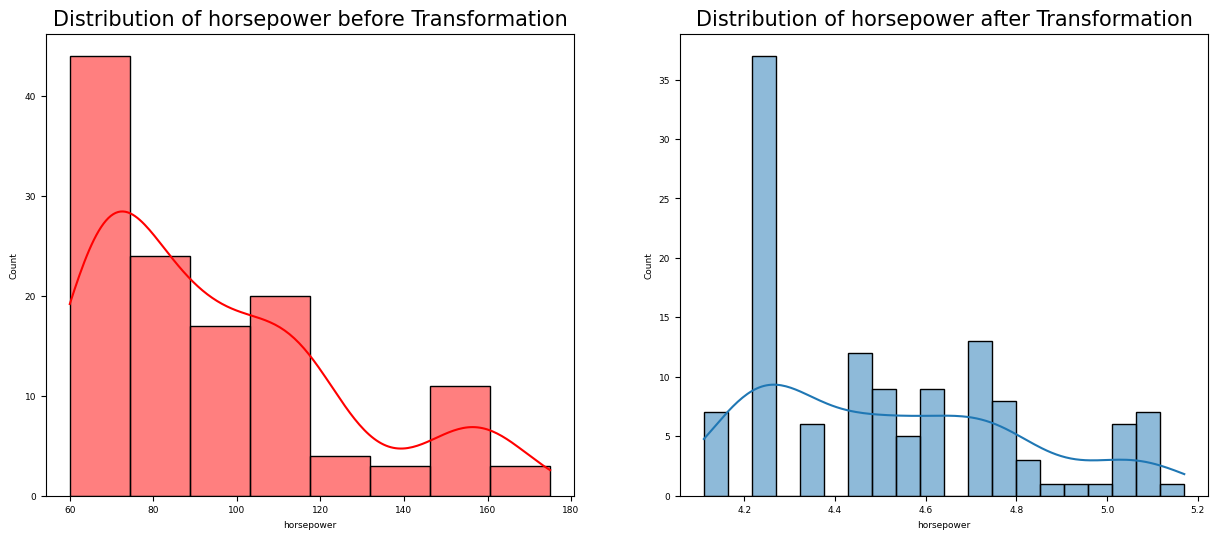

Skewness was 0.94184 before & is 0.52278 after Log transformation.


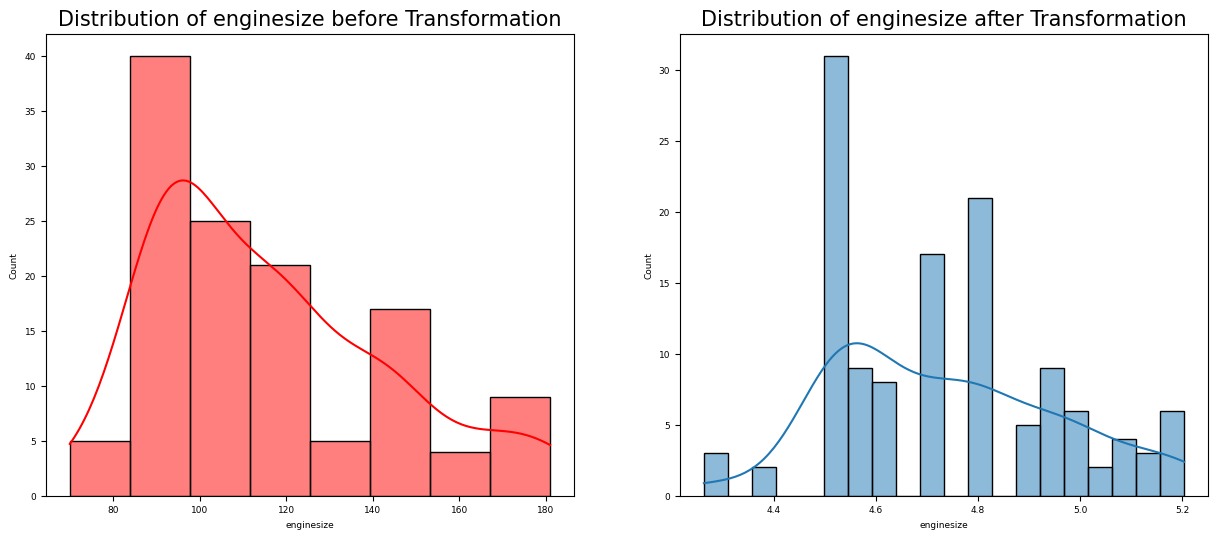

Skewness was 0.77388 before & is 0.36213 after Log transformation.


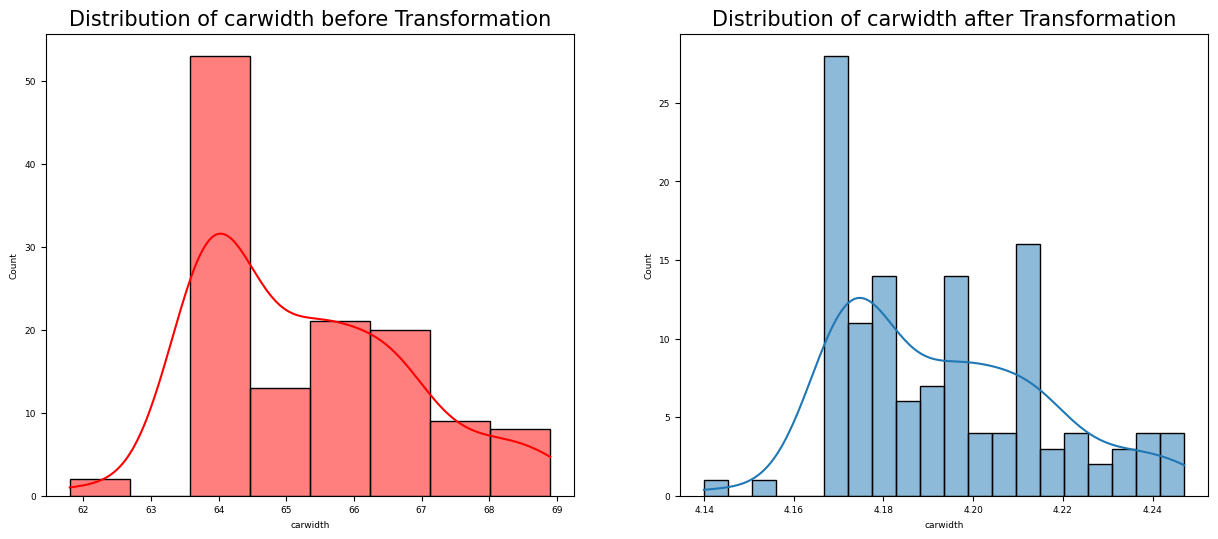

Skewness was 0.59137 before & is 0.54739 after Log transformation.


In [274]:
data3=logTrans(data2,features=["wheelbase","horsepower","enginesize","carwidth"])

In [275]:
print(data3.columns)

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [276]:
data3=data3.drop(["CarName","citympg"],axis=1)


In [277]:
print(data3.columns)

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'highwaympg', 'price'],
      dtype='object')


In [278]:
data_info(data3)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",1
1,fueltype,object,1,0,[gas],1
2,aspiration,object,2,0,"[std, turbo]",1
3,doornumber,object,2,0,"[four, two]",1
4,carbody,object,5,0,"[sedan, hatchback, wagon, convertible, hardtop]",1
5,drivewheel,object,3,0,"[fwd, rwd, 4wd]",1
6,enginelocation,object,1,0,[front],1
7,wheelbase,float64,33,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",1
8,carlength,float64,53,0,"[157.3, 188.8, 176.2, 177.8, 166.3, 186.6, 165...",1
9,carwidth,float64,31,0,"[4.1713056033582285, 4.212127597878484, 4.1682...",1


In [279]:
data3=data3.drop_duplicates()
data_info(data3)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",0
1,fueltype,object,1,0,[gas],0
2,aspiration,object,2,0,"[std, turbo]",0
3,doornumber,object,2,0,"[four, two]",0
4,carbody,object,5,0,"[sedan, hatchback, wagon, convertible, hardtop]",0
5,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
6,enginelocation,object,1,0,[front],0
7,wheelbase,float64,33,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",0
8,carlength,float64,53,0,"[157.3, 188.8, 176.2, 177.8, 166.3, 186.6, 165...",0
9,carwidth,float64,31,0,"[4.1713056033582285, 4.212127597878484, 4.1682...",0


In [280]:
info_cat=data3[Categorical_Features[1::]]
ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)
info_cat_1hot_arr=info_cat_1hot.toarray()
new_columns=ohe.get_feature_names_out()

In [281]:
info_cat_1hot_df=pd.DataFrame(info_cat_1hot_arr,columns=new_columns)

In [282]:
data3.merge(info_cat_1hot_df,left_index=True, right_index=True)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
0,3,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,gas,std,two,hatchback,rwd,front,4.559126,171.2,4.197202,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,gas,std,four,sedan,fwd,front,4.613138,176.6,4.207673,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,gas,std,four,sedan,4wd,front,4.609162,176.6,4.210645,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-2,gas,std,four,sedan,rwd,front,4.656813,188.8,4.222445,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
121,-1,gas,std,four,wagon,rwd,front,4.656813,188.8,4.222445,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
123,-1,gas,turbo,four,sedan,rwd,front,4.701389,188.8,4.245634,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [283]:
Categorical_Features
data3=data3.drop(Categorical_Features,axis=1)

In [284]:
data3.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,9.0,4.718499,5000,27,13495.0
1,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,9.0,4.718499,5000,27,16500.0
2,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,9.0,5.043425,5000,26,16500.0
3,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,10.0,4.634729,5500,30,13950.0
4,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,8.0,4.753590,5500,22,17450.0


In [285]:
from sklearn.preprocessing import StandardScaler

In [290]:
numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [291]:
numerical_features.remove('citympg')

In [292]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data3[numerical_features])
scaled_df=pd.DataFrame(scaled_data,columns=numerical_features)
scaled_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,-2.099602,-0.265602,-0.774135,-2.029681,0.336012,0.615013,0.796067,-3.108710,-0.204216,0.664924,-0.620789,-0.826679,0.550111
1,-2.099602,-0.265602,-0.774135,-2.029681,0.336012,0.615013,0.796067,-3.108710,-0.204216,0.664924,-0.620789,-0.826679,1.208175
2,-0.683387,-0.039686,0.153943,-0.532866,1.006341,1.311646,-2.372479,1.192609,-0.204216,1.806255,-0.620789,-1.001527,1.208175
3,0.516106,0.468625,0.610680,0.257119,-0.178312,-0.169019,-0.326962,0.811479,2.369076,0.370675,0.687788,-0.302137,0.649751
4,0.427805,0.468625,0.740303,0.257119,1.008778,0.815977,-0.326962,0.811479,-2.777509,0.788185,0.687788,-1.700917,1.416215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.486036,1.617030,1.254976,1.587621,1.540166,0.976834,2.039421,-0.549698,1.082430,0.757773,0.426073,-0.651832,1.211460
121,2.475965,1.617030,2.328899,0.756058,1.320786,0.976834,2.039421,-0.549698,1.082430,0.757773,0.426073,-0.651832,1.283726
122,2.475965,1.617030,2.266453,0.756058,1.557229,0.976834,2.039421,-0.549698,-0.976204,1.939660,0.164357,-1.176375,1.765503
123,2.475965,1.617030,2.328899,0.756058,1.467039,1.888809,1.237257,-2.074216,-0.718875,1.320990,0.687788,-1.526070,2.299838


In [293]:
data_info(data3)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,wheelbase,float64,33,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",0
1,carlength,float64,53,0,"[157.3, 188.8, 176.2, 177.8, 166.3, 186.6, 165...",0
2,carwidth,float64,31,0,"[4.1713056033582285, 4.212127597878484, 4.1682...",0
3,carheight,float64,37,0,"[52.0, 54.1, 54.5, 50.8, 55.5, 54.3, 56.1, 52....",0
4,curbweight,int64,109,0,"[2385, 1918, 1989, 1909, 2380, 2410, 2024, 253...",0
5,enginesize,float64,28,0,"[4.532599493153256, 4.51085950651685, 4.812184...",0
6,boreratio,float64,25,0,"[3.19, 3.15, 2.97, 3.03, 3.78, 3.62, 3.43, 3.0...",0
7,stroke,float64,22,0,"[3.23, 3.03, 3.15, 3.4, 3.29, 3.19, 3.07, 3.58...",0
8,compressionratio,float64,17,0,"[9.0, 9.4, 8.5, 9.3, 9.2, 9.5, 8.6, 9.6, 8.8, ...",0
9,horsepower,float64,32,0,"[4.23410650459726, 4.2626798770413155, 4.24849...",0
